## Imports
Import Semua Kebutuhan Library

In [6]:
import os
import random
import shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image
#from google.colab import drive
from sklearn.model_selection import train_test_split

## Collect Dataset
Mount Drive karena dataset disimpan di google drive

*(Jalankan kalo pake google colab, kalo pake google colab, jangan lupa upload dulu datasetnya ke google drive. Terus jangan lupa set source_path nya dengan sesuai)*

In [ ]:
#drive.mount('/content/drive')

## Explore Dataset
Copy Dataset ke Direktori baru, buat jaga-jaga biar dataset utamanya aman.

In [12]:
parent_folder = os.getcwd()

source_folder = os.path.join(parent_folder, "VeggieVision Backup")
target_folder = os.path.join(parent_folder, "VeggieVision Ready")

if not os.path.exists(target_folder):
    os.makedirs(target_folder)

for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    target_item = os.path.join(target_folder, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, target_item)
    else:
        shutil.copy2(source_item, target_item)

print("Folder 'VeggieVision Ready' telah dibuat dan diisi dengan isi dari 'VeggieVision Backup'.")

Folder 'VeggieVision Ready' telah dibuat dan diisi dengan isi dari 'VeggieVision Backup'.


Menghitung berapa dataset yang kita punya

In [2]:
source_path = 'VeggieVision Ready'

categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
conditions = ['fresh', 'stale']

total_images = 0

for condition in conditions:
    for category in categories:
        path = os.path.join(source_path, f"{condition}_{category}")
        count = len(os.listdir(path))
        total_images += count
        print(f"There are {count} images of {condition} {category}")

print(f"Total number of images in the dataset: {total_images}")

There are 484 images of fresh apple
There are 473 images of fresh banana
There are 327 images of fresh bitter_gourd
There are 497 images of fresh capsicum
There are 466 images of fresh orange
There are 409 images of fresh tomato
There are 488 images of stale apple
There are 425 images of stale banana
There are 357 images of stale bitter_gourd
There are 489 images of stale capsicum
There are 481 images of stale orange
There are 369 images of stale tomato
Total number of images in the dataset: 5265


Contoh dataset dari masing-masing class

Displaying images of fresh apple


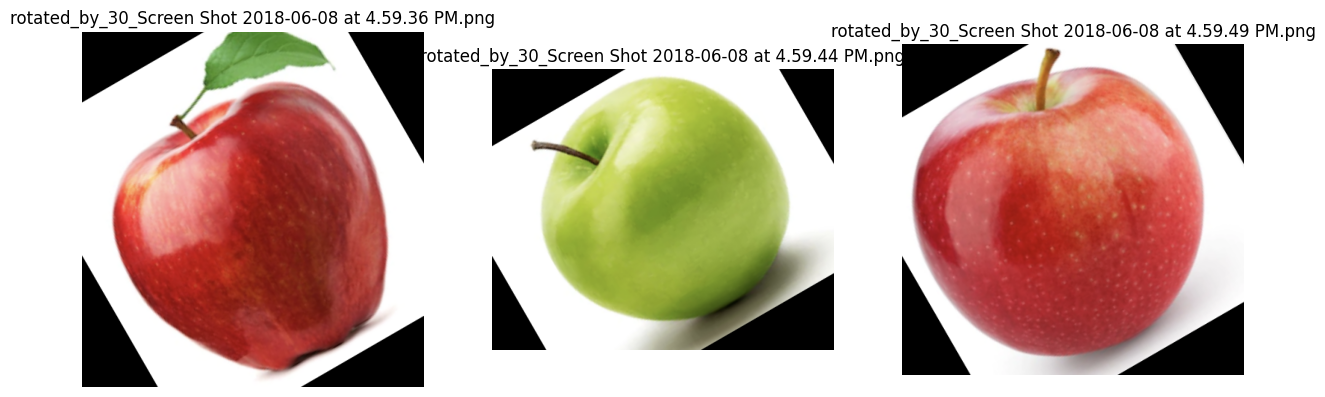

Displaying images of fresh banana


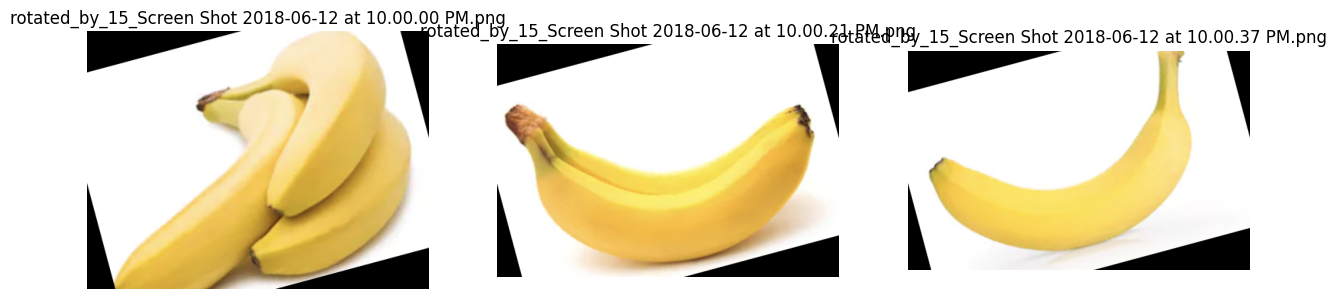

Displaying images of fresh bitter_gourd


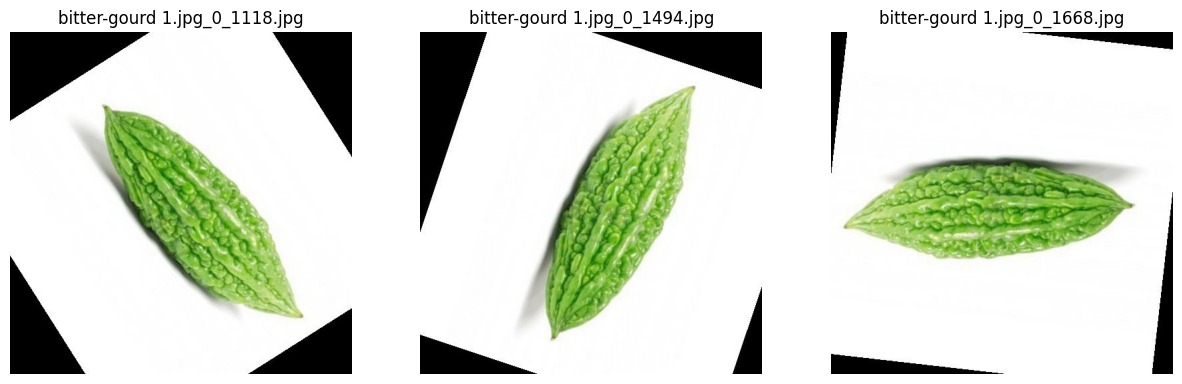

Displaying images of fresh capsicum


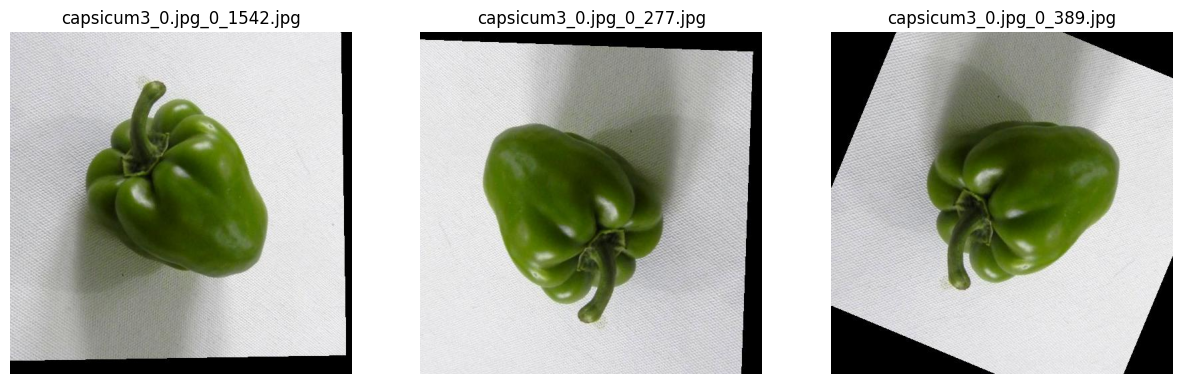

Displaying images of fresh orange


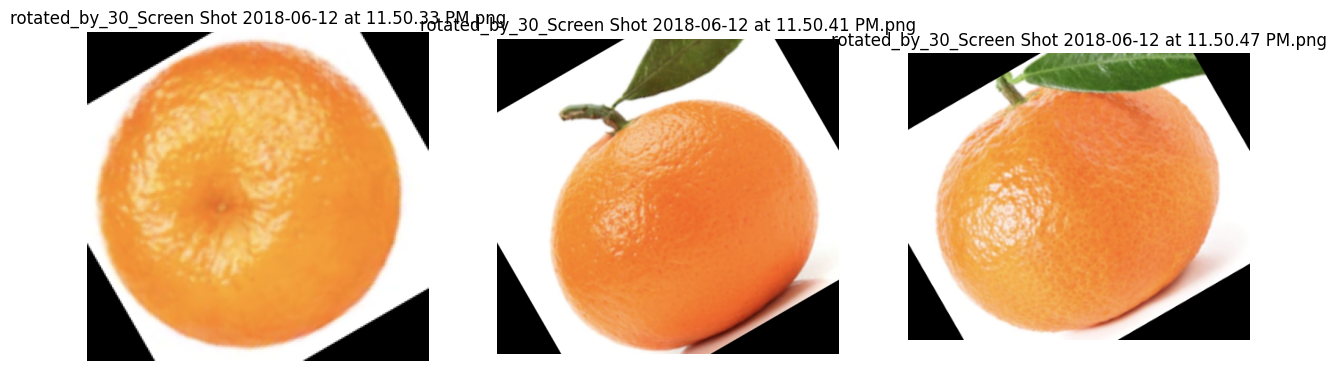

Displaying images of fresh tomato


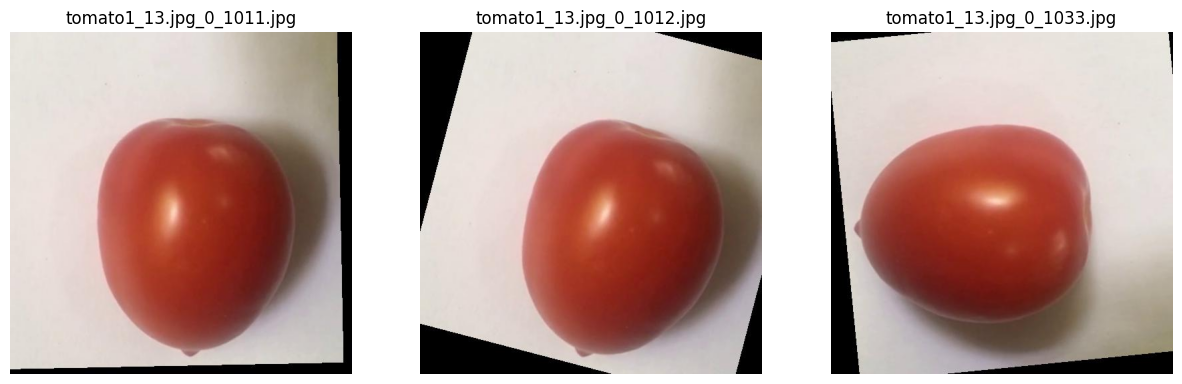

Displaying images of stale apple


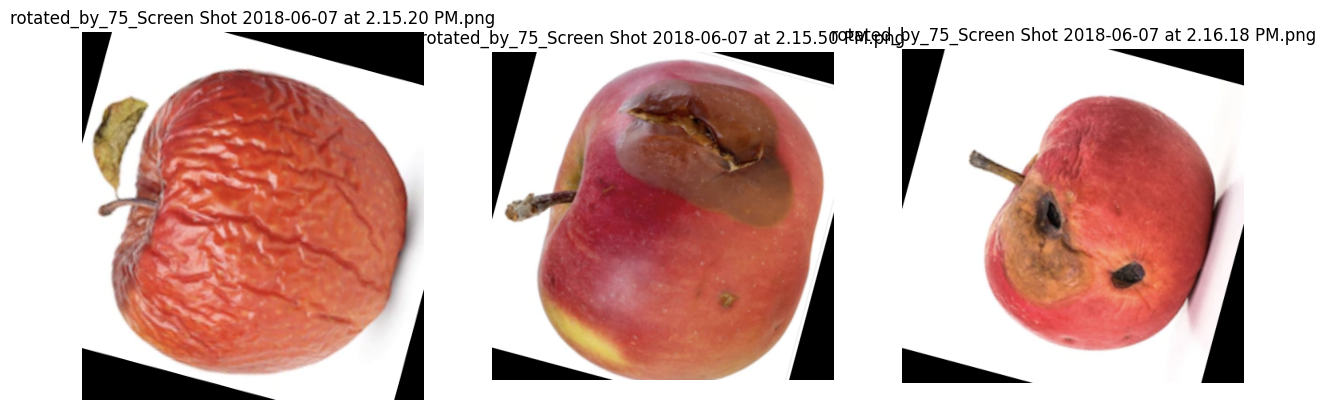

Displaying images of stale banana


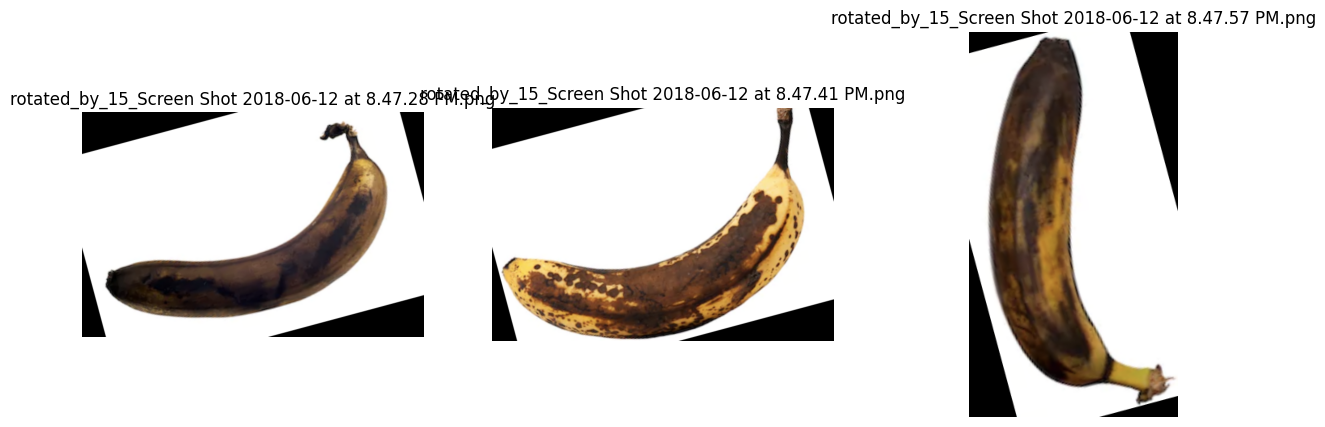

Displaying images of stale bitter_gourd


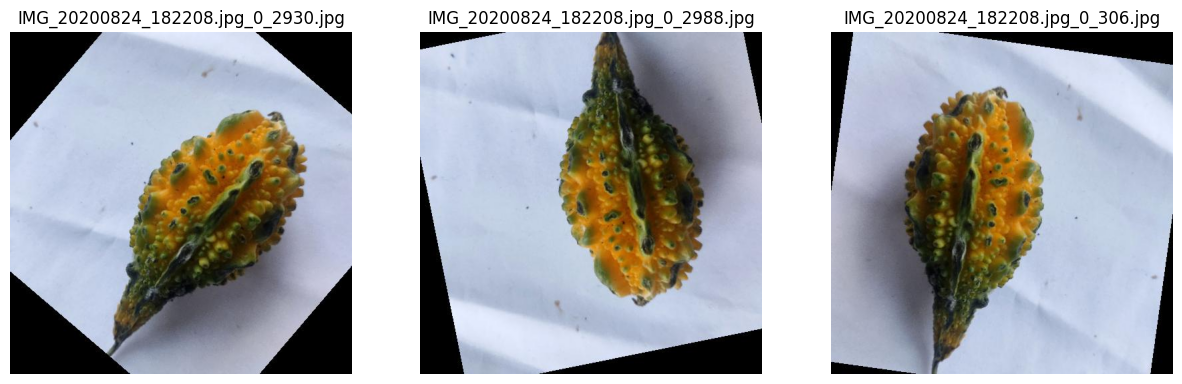

Displaying images of stale capsicum


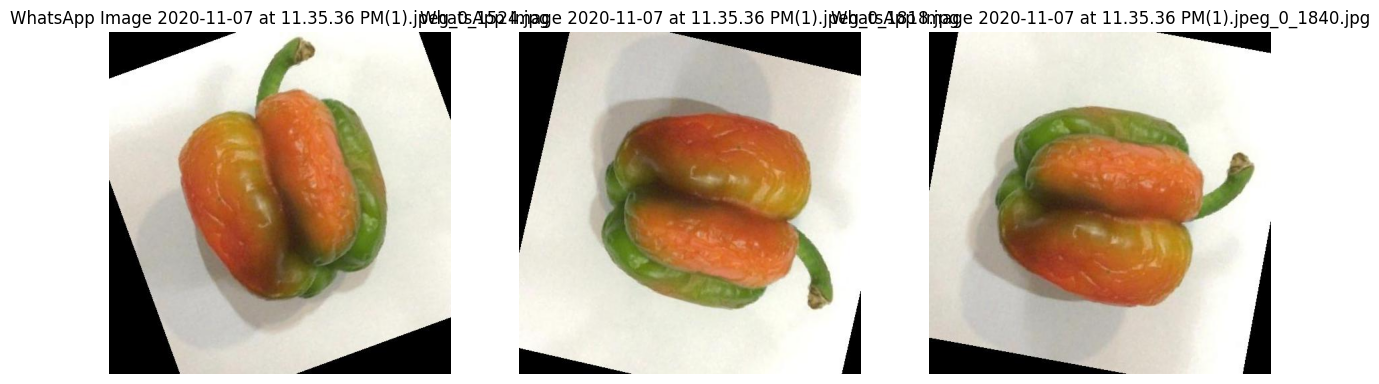

Displaying images of stale orange


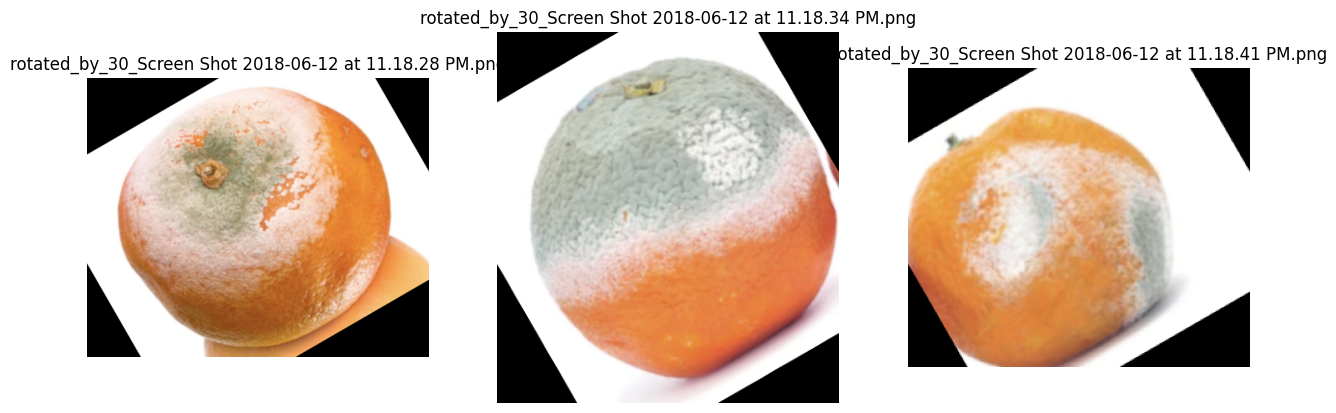

Displaying images of stale tomato


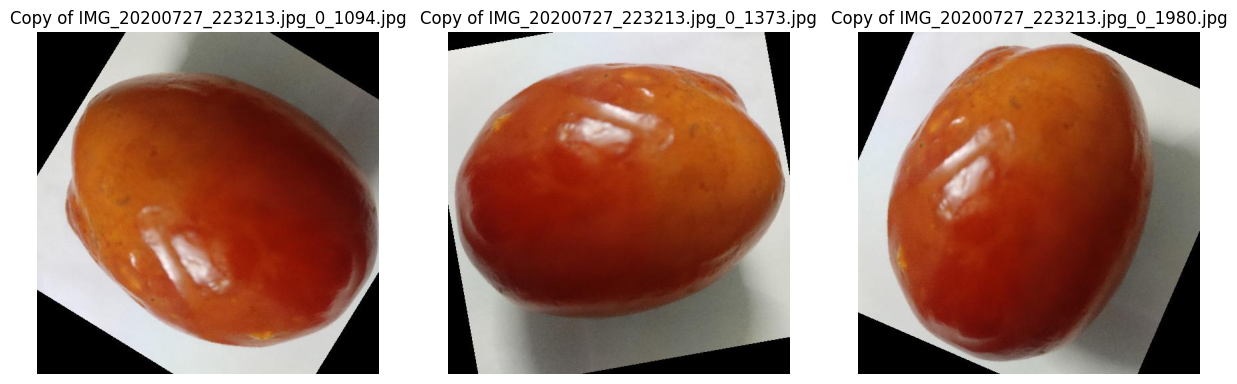

In [4]:
source_path = 'VeggieVision Ready'

categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
conditions = ['fresh', 'stale']

num_images_to_display = 3

def display_images_from_folder(folder_path, num_images):
    image_files = os.listdir(folder_path)
    selected_files = image_files[:num_images]
    
    plt.figure(figsize=(15, 5))
    
    for i, file_name in enumerate(selected_files):
        file_path = os.path.join(folder_path, file_name)
        img = Image.open(file_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(file_name)
        plt.axis('off')
    
    plt.show()

for condition in conditions:
    for category in categories:
        path = os.path.join(source_path, f"{condition}_{category}")
        print(f"Displaying images of {condition} {category}")
        display_images_from_folder(path, num_images_to_display)

## Cleaning Dataset
Membersihkan dataset yang tidak valid atau tidak dapat dibuka

*(Boleh ga di-run, soalnya udh kita cleaning manual)*

In [5]:
source_path = 'VeggieVision Ready'

categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
conditions = ['fresh', 'stale']

def is_image_valid(image_path):
    try:
        img = Image.open(image_path)
        img.verify()
        return True
    except (IOError, SyntaxError) as e:
        print(f"Invalid image file: {image_path} - {e}")
        return False

for condition in conditions:
    for category in categories:
        path = os.path.join(source_path, f"{condition}_{category}")
        image_files = os.listdir(path)
        
        for file_name in image_files:
            file_path = os.path.join(path, file_name)
            if not is_image_valid(file_path):
                os.remove(file_path)
                print(f"Removed invalid image file: {file_path}")

print("Data cleaning completed.")

Data cleaning completed.


Melakukan pemisahan dataset untuk ditraining dan untuk diuji coba

In [7]:
source_path = 'VeggieVision Ready'

destination_base_path = 'VeggieVisionSplit'
train_path = os.path.join(destination_base_path, 'train')
test_path = os.path.join(destination_base_path, 'test')

categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
conditions = ['fresh', 'stale']

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

for condition in conditions:
    for category in categories:
        class_path = os.path.join(source_path, f"{condition}_{category}")
        image_files = os.listdir(class_path)
        
        train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
        
        train_class_path = os.path.join(train_path, f"{condition}_{category}")
        test_class_path = os.path.join(test_path, f"{condition}_{category}")
        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)
        
        for file_name in train_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(train_class_path, file_name))
        
        for file_name in test_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(test_class_path, file_name))
        
        print(f"There are {len(train_files)} images of {condition} {category} to be trained, and {len(test_files)} images of {condition} {category} to be tested")

print("Dataset splitting completed.")

There are 387 images of fresh apple to be trained, and 97 images of fresh apple to be tested
There are 378 images of fresh banana to be trained, and 95 images of fresh banana to be tested
There are 261 images of fresh bitter_gourd to be trained, and 66 images of fresh bitter_gourd to be tested
There are 397 images of fresh capsicum to be trained, and 100 images of fresh capsicum to be tested
There are 372 images of fresh orange to be trained, and 94 images of fresh orange to be tested
There are 327 images of fresh tomato to be trained, and 82 images of fresh tomato to be tested
There are 390 images of stale apple to be trained, and 98 images of stale apple to be tested
There are 340 images of stale banana to be trained, and 85 images of stale banana to be tested
There are 285 images of stale bitter_gourd to be trained, and 72 images of stale bitter_gourd to be tested
There are 391 images of stale capsicum to be trained, and 98 images of stale capsicum to be tested
There are 384 images 

## Build Model
Generator

In [9]:
def train_val_generators(train_path, test_path):

    train_path = 'VeggieVisionSplit/train'
    test_path = 'VeggieVisionSplit/test'

    img_width, img_height = 150, 150

    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, test_generator

In [20]:
# Testing generators
train_generator, test_generator = train_val_generators(train_path, test_path)

Found 4207 images belonging to 12 classes.
Found 1058 images belonging to 12 classes.


In [21]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),

        tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
    ])


    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    return model

## Training

In [25]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=12,
                    verbose=2,
                    validation_data=test_generator)

Epoch 1/12
132/132 - 59s - loss: 1.0837 - accuracy: 0.6154 - val_loss: 0.5545 - val_accuracy: 0.8185 - 59s/epoch - 448ms/step
Epoch 2/12
132/132 - 89s - loss: 0.2855 - accuracy: 0.9054 - val_loss: 0.2087 - val_accuracy: 0.9357 - 89s/epoch - 675ms/step
Epoch 3/12
132/132 - 100s - loss: 0.1976 - accuracy: 0.9332 - val_loss: 0.1978 - val_accuracy: 0.9272 - 100s/epoch - 760ms/step
Epoch 4/12
132/132 - 96s - loss: 0.1563 - accuracy: 0.9463 - val_loss: 0.1577 - val_accuracy: 0.9442 - 96s/epoch - 726ms/step
Epoch 5/12
132/132 - 89s - loss: 0.1058 - accuracy: 0.9636 - val_loss: 0.1588 - val_accuracy: 0.9471 - 89s/epoch - 673ms/step
Epoch 6/12
132/132 - 59s - loss: 0.0980 - accuracy: 0.9667 - val_loss: 0.3035 - val_accuracy: 0.9093 - 59s/epoch - 446ms/step
Epoch 7/12
132/132 - 78s - loss: 0.0916 - accuracy: 0.9677 - val_loss: 0.1767 - val_accuracy: 0.9423 - 78s/epoch - 594ms/step
Epoch 8/12
132/132 - 99s - loss: 0.1011 - accuracy: 0.9693 - val_loss: 0.2253 - val_accuracy: 0.9310 - 99s/epoch - 7

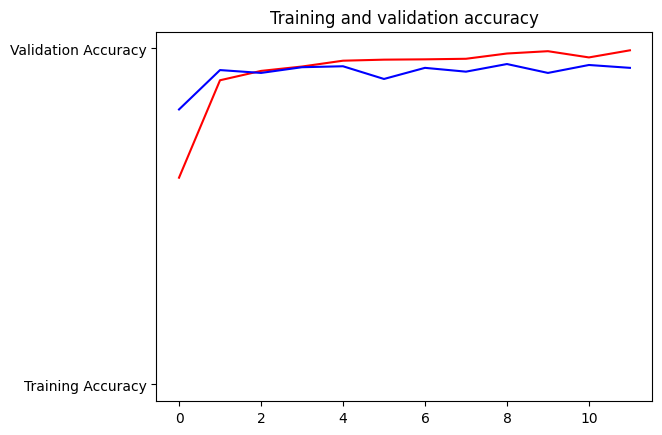

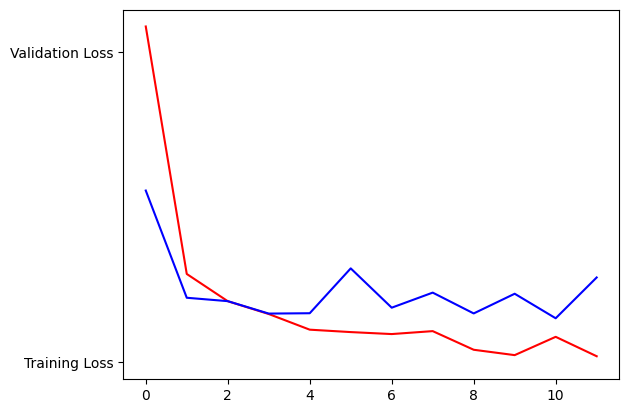

In [26]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [27]:
#Evaluasi model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

34/34 - 4s - loss: 0.2742 - accuracy: 0.9423 - 4s/epoch - 116ms/step

Test accuracy: 0.942344069480896


## Testing

In [68]:
img_width, img_height = 150, 150

def predict_image(model, img_path, img_width, img_height):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    confidence = np.max(prediction) * 100
    predicted_class = np.argmax(prediction, axis=1)
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    
    predicted_label = class_labels[predicted_class[0]]
    
    if 'fresh' in predicted_label:
        freshness_percentage = confidence
    else:
        freshness_percentage = 100 - confidence
    
    return predicted_label, freshness_percentage

# Path ke gambar yang diuji
new_image_path = 'VeggieVisionSplit/test/stale_capsicum/WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpg_0_4594.jpg'

predicted_label, freshness_percentage = predict_image(model, new_image_path, img_width, img_height)
print(f"Prediksi: {predicted_label} dengan persentase kesegaran {freshness_percentage:.2f}%")

1/1 [==============================] - 0s 21ms/step
Prediksi: stale_capsicum dengan persentase kesegaran 0.04%


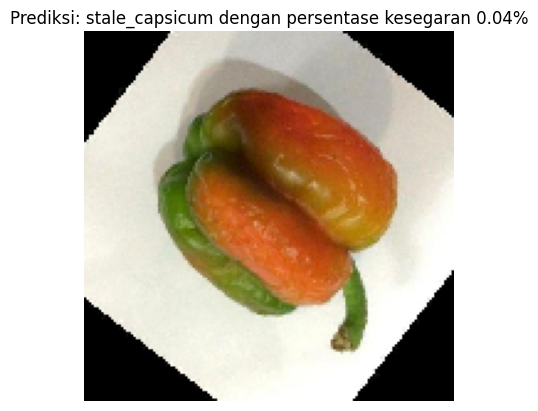

In [69]:
def display_prediction_with_freshness(img_path, predicted_label, freshness_percentage):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f'Prediksi: {predicted_label} dengan persentase kesegaran {freshness_percentage:.2f}%')
    plt.axis('off')
    plt.show()

display_prediction_with_freshness(new_image_path, predicted_label, freshness_percentage)